**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self,n_neighbors=3):
        self._k=n_neighbors
    def fit(self, X, y):
        if y.shape[0]!=X.shape[0]:
            print "wrong number of marks : y_train != X_train"
        if X.shape[0]<2:
            print "fit with one element..."
        self.X_=X
        self.y_=y
        self.classes_ = np.unique(y)
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        
        
    @staticmethod    
    def v_M_dist(v,M):
        if len(M.shape)>1:#этот if чтобы не падала программа , когда только один элемент в test
            return np.linalg.norm(M-v,axis=1)
        else:
            return np.linalg.norm(M-v)
    @staticmethod    
    def predict1(X,self):
        #rez=np.zeros(np.shape(X)[0],dtype=int)
        #a=np.apply_along_axis(MyKNeighborsClassifier.v_M_dist, 1, self.X_, X)
        #yks=np.argsort(a,axis=0)[:self._k,:]
        a=MyKNeighborsClassifier.v_M_dist(X,self.X_)
        #yks=np.argpartition(a,self._k-1,axis=0)[:self._k]
        yks=np.argsort(a)[:self._k]
        #for j in range(np.shape(X)[0]):
        un, cts = np.unique(self.y_[yks], return_counts=True)
        rez=un[np.argsort(cts)][-1]
        return rez
    
    def predict(self,X):
        return np.apply_along_axis(MyKNeighborsClassifier.predict1,1,X,self)
        
    
    def predict_proba(self,X):
        rez=np.zeros([np.shape(X)[0], self.classes_.shape[0] ],dtype=float)
        
        a=np.apply_along_axis(MyKNeighborsClassifier.v_M_dist, 1, self.X_, X)
        
        yks=np.argpartition(a,self._k-1,axis=0)[:self._k]
        for j in range(np.shape(X)[0]):
            un, cts = np.unique(self.y_[yks[:,j]], return_counts=True)
            norm=cts.sum()
            cts=cts/norm
            rr=np.zeros(self.classes_.shape[0],dtype=float)
            for i,cl in enumerate(self.classes_):
                ind=np.where(un==cl)
                if np.shape(ind)[1]!=0:
                    rr[i]=cts[ind]
                                
                rez[j,:]=rr
        return rez
    
    

    def score(self,X, y):
        
        return np.mean(self.predict(X)==y)

**IRIS**

In [129]:
iris = datasets.load_iris()

In [255]:
N=100
Pred=np.zeros(N)
Proba=np.zeros(N)
t=np.zeros(N)
ts=np.zeros(N)
for i in range(N):

    
    iris = datasets.load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
    clf = KNeighborsClassifier(n_neighbors=2)
    my_clf = MyKNeighborsClassifier(n_neighbors=2)
    clf.fit(X_train, y_train)
    my_clf.fit(X_train, y_train)
    z=clf.predict(X_test)
    zz=my_clf.predict(X_test)
    Pred[i]=(z==zz).mean()
    #Pred[i]=np.linalg.norm(z-zz)
    cc=my_clf.predict_proba(X_test)
    c=clf.predict_proba(X_test)
    Proba[i]=np.linalg.norm(c-cc)
    t[i]=float((zz==y_test).sum())/(y_test==y_test).sum()-float((z==y_test).sum())/(y_test==y_test).sum()
print t



[ 0.06666667  0.          0.06666667  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.06666667  0.          0.          0.          0.          0.06666667
  0.          0.          0.          0.          0.          0.06666667
  0.          0.          0.          0.          0.          0.06666667
  0.          0.          0.          0.          0.06666667  0.
  0.06666667  0.          0.         -0.06666667  0.          0.06666667
  0.          0.          0.06666667  0.          0.          0.
  0.          0.          0.06666667  0.          0.          0.06666667
  0.          0.          0.06666667  0.          0.          0.
  0.06666667  0.06666667  0.          0.06666667  0.          0.
  0.          0.          0.06666667  0.          0.          0.
  0.          0.06666667  0.          0.          0.         -0.06666667
  0.          0.06666667  0.          0.          0.          0.06666667
  0.          0.          0.066666

In [244]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [84]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [85]:
%time clf.fit(X_train, y_train)

CPU times: user 412 µs, sys: 264 µs, total: 676 µs
Wall time: 686 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [86]:
%time my_clf.fit(X_train, y_train)

CPU times: user 51 µs, sys: 45 µs, total: 96 µs
Wall time: 101 µs


In [87]:
%time clf.predict(X_test)

CPU times: user 1.31 ms, sys: 0 ns, total: 1.31 ms
Wall time: 1.02 ms


array([2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0])

In [88]:
%time my_clf.predict(X_test)
#my_clf.predict(x_tst)

CPU times: user 2.73 ms, sys: 0 ns, total: 2.73 ms
Wall time: 2.16 ms


array([2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0])

In [89]:
%time c=clf.predict_proba(X_test)

CPU times: user 895 µs, sys: 667 µs, total: 1.56 ms
Wall time: 1.13 ms


In [90]:
%time cc=my_clf.predict_proba(X_test)

CPU times: user 6.51 ms, sys: 0 ns, total: 6.51 ms
Wall time: 5.61 ms


In [91]:
clf.score(X_test, y_test)

1.0

In [92]:
my_clf.score(X_test, y_test)

1.0

In [95]:
mc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [105]:
mc=np.zeros(N)
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)
mc[2]=my_clf.score(X_test, y_test)
print k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


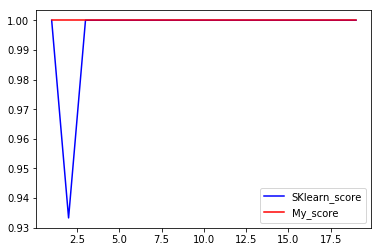

In [213]:
# Задание 3
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
n=20
k=range(1,n)
c=np.zeros(n-1)
mc=np.zeros(n-1)
for i in k:
    
    clf = KNeighborsClassifier(n_neighbors=i)
    my_clf = MyKNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    my_clf.fit(X_train, y_train)
    mc[i-1]=my_clf.score(X_test, y_test)
    #print mc
    c[i-1]=clf.score(X_test, y_test)
plt.plot(k, c, color='blue', label='SKlearn_score')
plt.plot(k, mc, color='red', label='My_score')
plt.legend()

In [172]:
c

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333, 1.        ,
       1.        , 1.        , 1.        , 1.        ])

**MNIST**

In [3]:
mnist = fetch_mldata('MNIST original')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [5]:
np.unique(mnist.target)


array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [6]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [7]:
%time clf.fit(X_train, y_train)

CPU times: user 42.9 s, sys: 155 ms, total: 43 s
Wall time: 43 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [8]:
%time my_clf.fit(X_train, y_train)

CPU times: user 3.28 ms, sys: 0 ns, total: 3.28 ms
Wall time: 3.27 ms


In [228]:
%time skpr=clf.predict(X_test)

CPU times: user 10min 37s, sys: 318 ms, total: 10min 38s
Wall time: 10min 40s


In [ ]:
%time mypr=my_clf.predict(X_test)

In [235]:
float((skpr==y_test).sum())/(y_test==y_test).sum()

0.9694285714285714

In [239]:
float((mypr==y_test).sum())/(y_test==y_test).sum()

0.38042857142857145

In [240]:
float((skpr==y_test).sum())/(y_test==y_test).sum()

0.9694285714285714

In [227]:
#print np.linalg.norm(skpr-mypr)
print skpr
print mypr
s= skpr==mypr
s.mean()
#s.shape

[0 2 2 2 1 1 0 0 1 0 2 2 0 1 1]
[0 2 2 2 1 1 0 0 1 0 2 2 0 1 1]


1.0

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [ ]:
# seaborn - 
# matplotlib - построение графиков 
# train_test_split
# Pipeline (from sklearn.pipeline import Pipeline)
# StandardScaler (from sklearn.preprocessing import StandardScaler)
# ClassifierMixin
# NeighborsBase
# KNeighborsMixin
# SupervisedIntegerMixin